In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import MobileNetV2

2024-04-08 07:37:21.182329: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 07:37:21.182453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 07:37:21.367223: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
path = "/kaggle/input/realwaste-dataset/RealWaste"

In [4]:
train=tf.keras.utils.image_dataset_from_directory(
    path,
    color_mode="rgb",
    batch_size=16,
    subset="training",
    image_size=(224,224),
    seed=123,
    shuffle=True,
    validation_split=0.2,
    )

Found 4752 files belonging to 9 classes.
Using 3802 files for training.


In [5]:
validation=tf.keras.utils.image_dataset_from_directory(
    path,
    color_mode="rgb",
    batch_size=16,
    subset="validation",
    image_size=(224,224),
    seed=123,
    shuffle=True,
    validation_split=0.2,
    )

Found 4752 files belonging to 9 classes.
Using 950 files for validation.


In [6]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train = train.map(process)
validation = validation.map(process)

In [7]:

model = Sequential()

model.add(tf.keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False,  input_shape=(224,224,3)))
for layer in model.layers:
  layer.trainable = True
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(125,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(9,activation='softmax'))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [9]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train,epochs=25,validation_data=validation)

Epoch 1/25
  1/238 ━━━━━━━━━━━━━━━━━━━━ 3:57:15 60s/step - accuracy: 0.0000e+00 - loss: 2.6741

I0000 00:00:1712561919.412861      95 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712561919.484436      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.2368 - loss: 2.4038

W0000 00:00:1712561966.599645      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


238/238 ━━━━━━━━━━━━━━━━━━━━ 114s 226ms/step - accuracy: 0.2373 - loss: 2.4022 - val_accuracy: 0.4547 - val_loss: 1.6201
Epoch 2/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.6084 - loss: 1.2119 - val_accuracy: 0.5621 - val_loss: 1.3685
Epoch 3/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.7063 - loss: 0.8882 - val_accuracy: 0.6189 - val_loss: 1.1878
Epoch 4/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.7706 - loss: 0.7102 - val_accuracy: 0.6579 - val_loss: 1.0443
Epoch 5/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.8066 - loss: 0.6099 - val_accuracy: 0.6768 - val_loss: 0.9644
Epoch 6/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.8428 - loss: 0.5119 - val_accuracy: 0.7084 - val_loss: 0.8983
Epoch 7/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.8745 - loss: 0.4228 - val_accuracy: 0.7253 - val_loss: 0.8490
Epoch 8/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.8986 - loss: 0.3621 - val_accur

In [13]:
model.save("mobilenetv2.keras")

In [20]:
y_pred = model.predict(validation)

 8/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

W0000 00:00:1712564221.853144      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step


In [22]:
y_pred_ = []
for i in range (len(y_pred)):
    y_pred_.append(np.argmax(y_pred[i]))

In [24]:
labels_list = []
for images,labels in validation:
    labels_list.append(labels)


In [25]:
for i in range (len(labels_list)):
    labels_list[i] = labels_list[i].numpy().tolist()

In [29]:
flattened_list = []
for sublist in labels_list:
    flattened_list.extend(sublist)

In [30]:
true_labels = flattened_list
predicted_labels = y_pred_

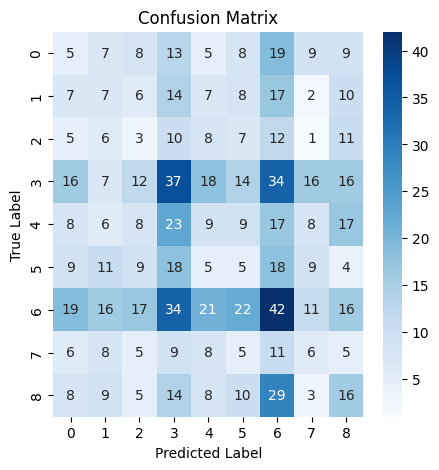

In [31]:
classes=['0','1','2','3','4','5','6','7','8','9']
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix as a heatmap
classes = np.unique(true_labels)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()